Business problem: How to choose which customers to accept in loan application so that the risk level is low?

The objective is to create a model can be developed to predict whether a new loan application should be approved or rejected.


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets, linear_model, metrics
import seaborn as sns


In [3]:
df = pd.read_csv("Credit_Scoring_Dataset.csv")
df

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,1,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved
1,2,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected
2,3,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected
3,4,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected
4,5,5,Not Graduate,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4264,4265,5,Graduate,Yes,1000000,2300000,12,317,2800000,500000,3300000,800000,Rejected
4265,4266,0,Not Graduate,Yes,3300000,11300000,20,559,4200000,2900000,11000000,1900000,Approved
4266,4267,2,Not Graduate,No,6500000,23900000,18,457,1200000,12400000,18100000,7300000,Rejected
4267,4268,1,Not Graduate,No,4100000,12800000,8,780,8200000,700000,14100000,5800000,Approved


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4269 entries, 0 to 4268
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   loan_id                    4269 non-null   int64 
 1    no_of_dependents          4269 non-null   int64 
 2    education                 4269 non-null   object
 3    self_employed             4269 non-null   object
 4    income_annum              4269 non-null   int64 
 5    loan_amount               4269 non-null   int64 
 6    loan_term                 4269 non-null   int64 
 7    cibil_score               4269 non-null   int64 
 8    residential_assets_value  4269 non-null   int64 
 9    commercial_assets_value   4269 non-null   int64 
 10   luxury_assets_value       4269 non-null   int64 
 11   bank_asset_value          4269 non-null   int64 
 12   loan_status               4269 non-null   object
dtypes: int64(10), object(3)
memory usage: 433.7+ KB


In [5]:
df.describe()

,loan_id,no_of_dependents,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value
count,4269.000000,4269.000000,4.269000e+03,4.269000e+03,4269.000000,4269.000000,4.269000e+03,4.269000e+03,4.269000e+03,4.269000e+03
mean,2135.000000,2.498712,5.059124e+06,1.513345e+07,10.900445,599.936051,7.472617e+06,4.973155e+06,1.512631e+07,4.976692e+06
std,1232.498479,1.695910,2.806840e+06,9.043363e+06,5.709187,172.430401,6.503637e+06,4.388966e+06,9.103754e+06,3.250185e+06
min,1.000000,0.000000,2.000000e+05,3.000000e+05,2.000000,300.000000,-1.000000e+05,0.000000e+00,3.000000e+05,0.000000e+00
25%,1068.000000,1.000000,2.700000e+06,7.700000e+06,6.000000,453.000000,2.200000e+06,1.300000e+06,7.500000e+06,2.300000e+06
50%,2135.000000,3.000000,5.100000e+06,1.450000e+07,10.000000,600.000000,5.600000e+06,3.700000e+06,1.460000e+07,4.600000e+06
75%,3202.000000,4.000000,7.500000e+06,2.150000e+07,16.000000,748.000000,1.130000e+07,7.600000e+06,2.170000e+07,7.100000e+06
max,4269.000000,5.000000,9.900000e+06,3.950000e+07,20.000000,900.000000,2.910000e+07,1.940000e+07,3.920000e+07,1.470000e+07


In [6]:
num_dtypes = ["int32", "int64", "float32", "float64"]

In [7]:
df_num = df.select_dtypes(include = num_dtypes)
num_cols = df_num.columns

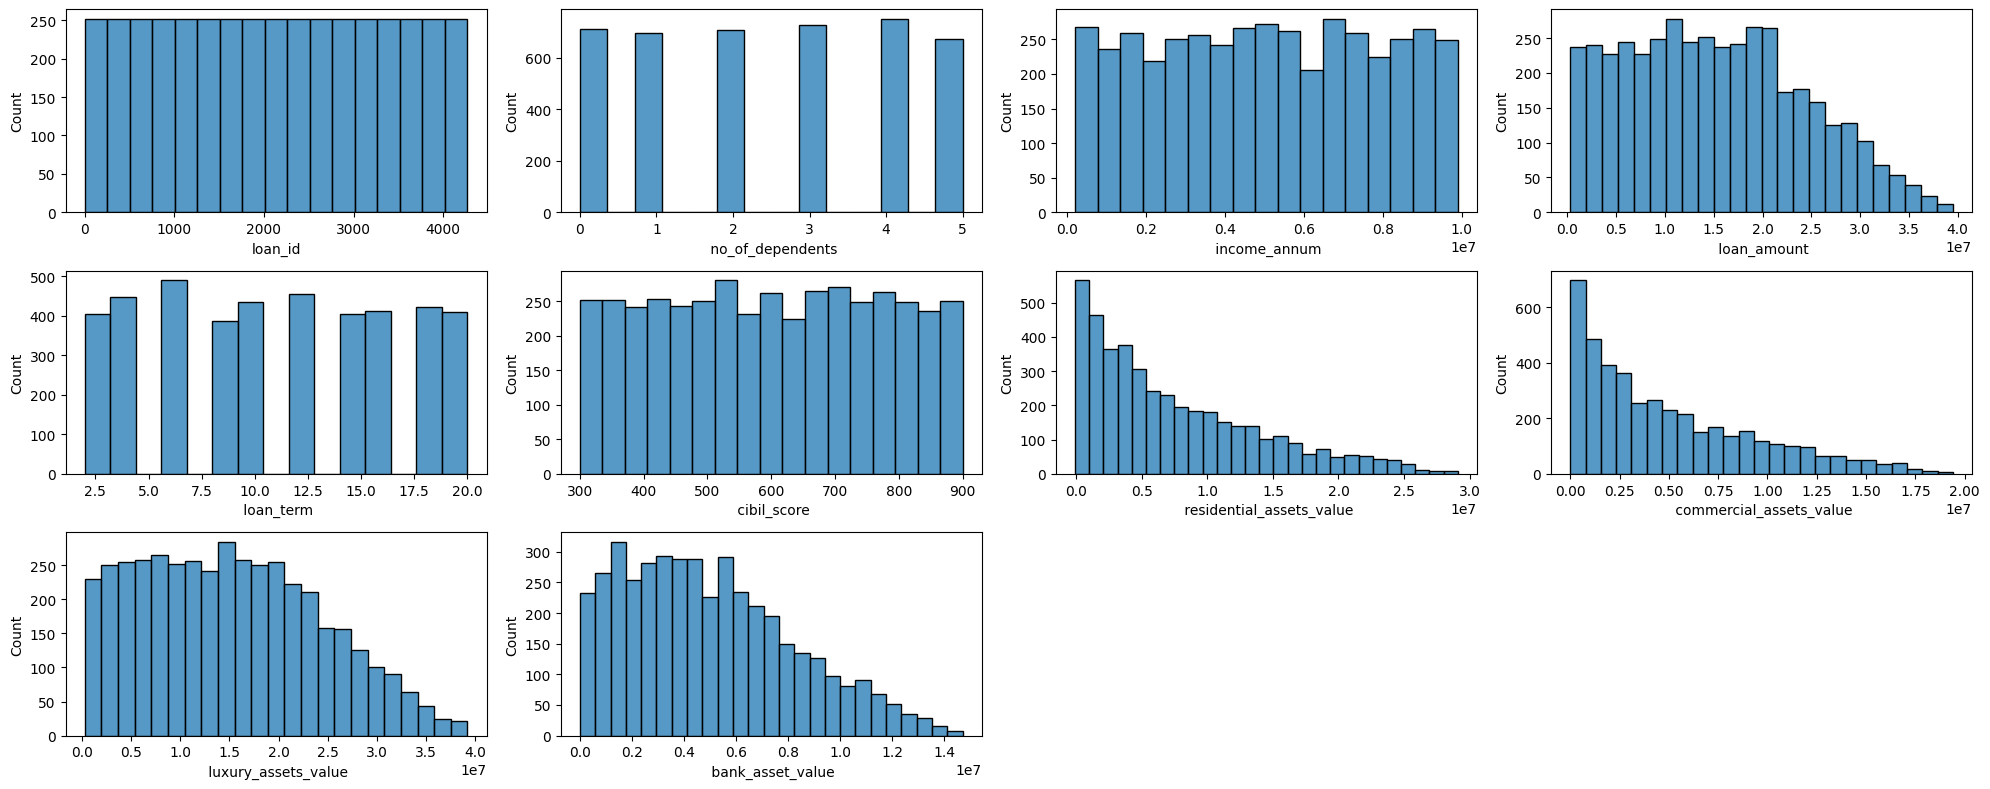

In [8]:
plt.figure(figsize = (20,8))
for i in range(len(num_cols)):
    plt.subplot(3,4,i+1)
    sns.histplot(df[num_cols[i]])
    plt.tight_layout()

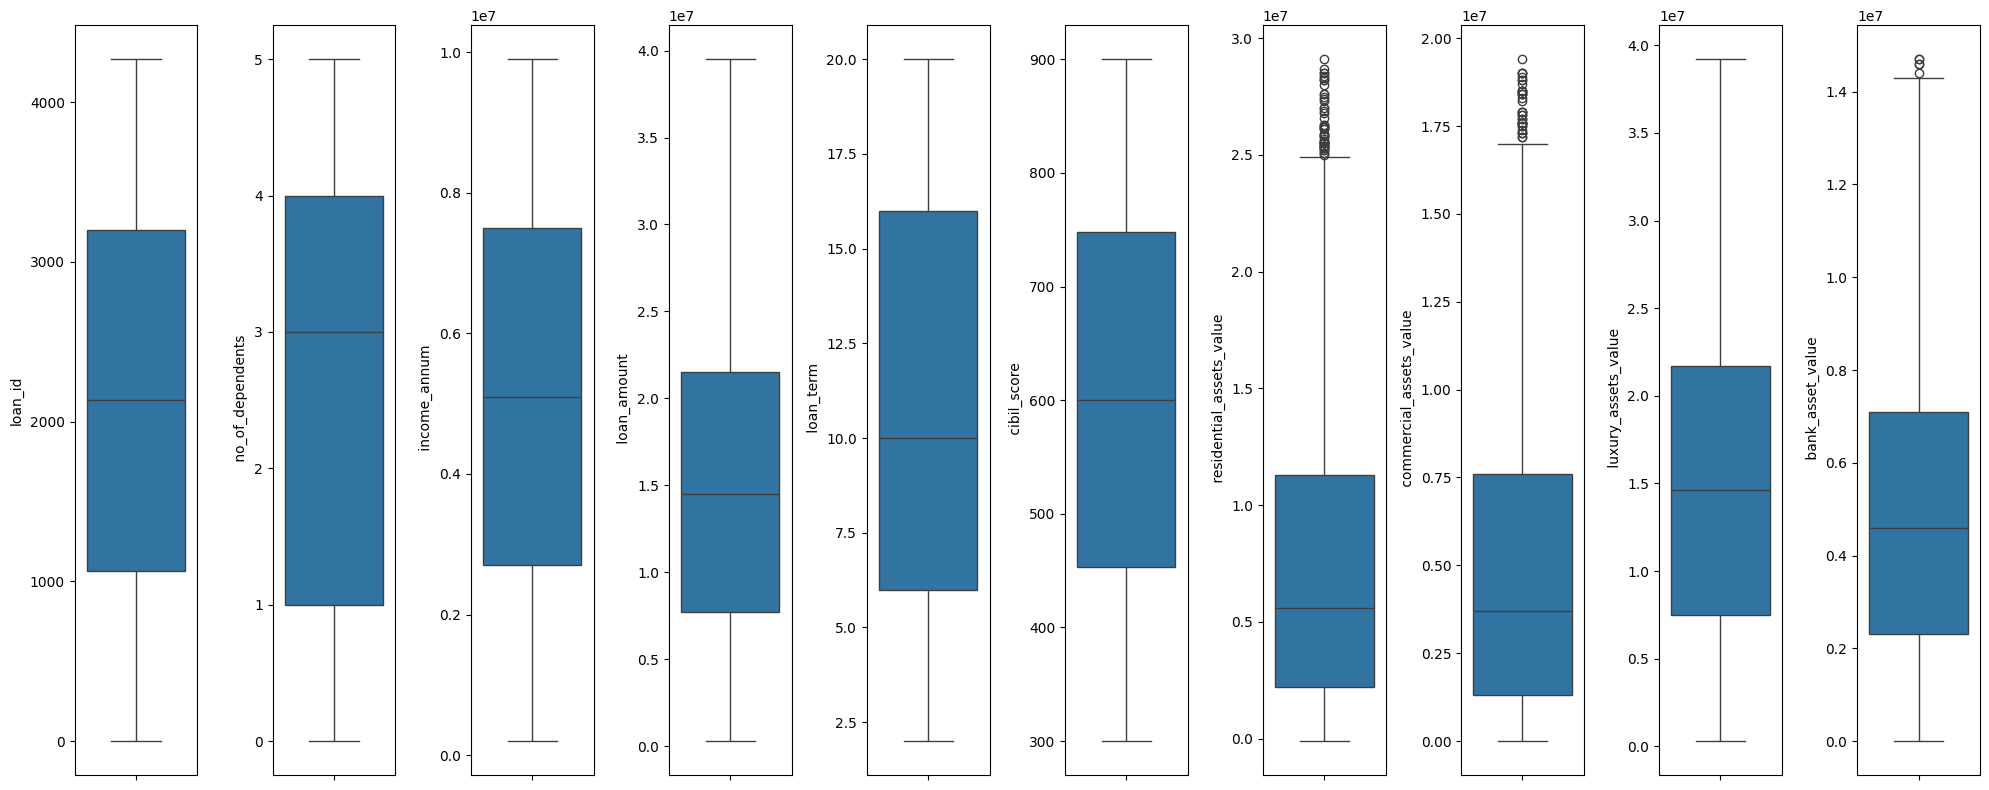

In [9]:
plt.figure(figsize = (20,8))
for i in range(len(num_cols)):
    plt.subplot(1,len(num_cols),i+1)
    sns.boxplot(df[num_cols[i]], orient = "v")
    plt.tight_layout() 

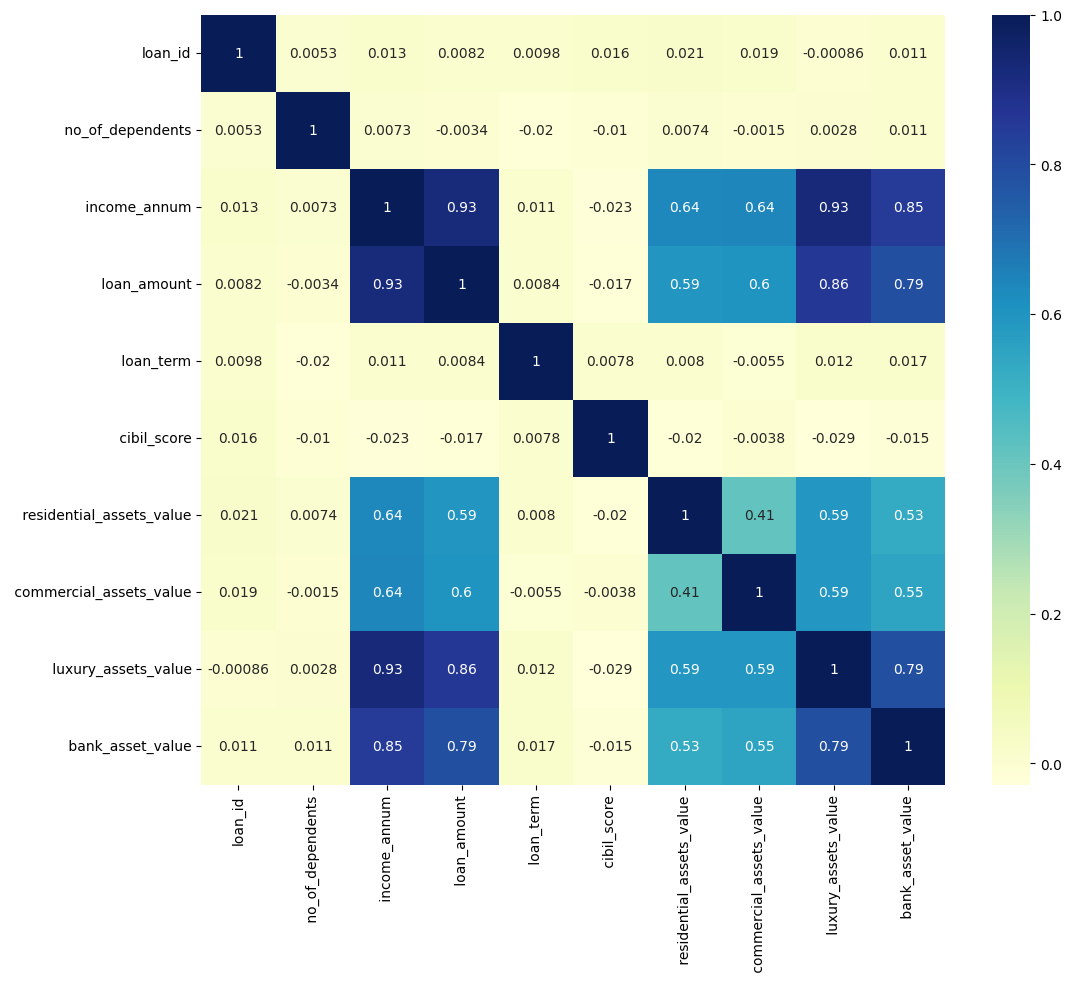

In [10]:
plt.figure(figsize=(12, 10))
sns.heatmap(df[num_cols].corr(), cmap="YlGnBu", annot = True)
plt.show()


In [11]:
df.isna().sum()

loan_id                      0
 no_of_dependents            0
 education                   0
 self_employed               0
 income_annum                0
 loan_amount                 0
 loan_term                   0
 cibil_score                 0
 residential_assets_value    0
 commercial_assets_value     0
 luxury_assets_value         0
 bank_asset_value            0
 loan_status                 0
dtype: int64

In [12]:
df.duplicated().sum()

0

In [13]:
negative = (df[' residential_assets_value'] < 0).sum()
print(f"Number of negative values: {negative}")

Number of negative values: 28


In [14]:
df[' residential_assets_value'] = df[' residential_assets_value'].abs()


In [15]:
negative = (df[' residential_assets_value'] < 0).sum()
print(f"Number of negative values: {negative}")

Number of negative values: 0


In [16]:
Q1 = df[' residential_assets_value'].quantile(0.25)
Q3 = df[' residential_assets_value'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

df[' residential_assets_value'] = df[' residential_assets_value'].apply(
    lambda x: upper_bound if x > upper_bound else (lower_bound if x < lower_bound else x)
)

In [17]:
Q1 = df[' commercial_assets_value'].quantile(0.25)
Q3 = df[' commercial_assets_value'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

df[' commercial_assets_value'] = df[' commercial_assets_value'].apply(
    lambda x: upper_bound if x > upper_bound else (lower_bound if x < lower_bound else x)
)

In [18]:
Q1 = df[' bank_asset_value'].quantile(0.25)
Q3 = df[' bank_asset_value'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

df[' bank_asset_value'] = df[' bank_asset_value'].apply(
    lambda x: upper_bound if x > upper_bound else (lower_bound if x < lower_bound else x)
)

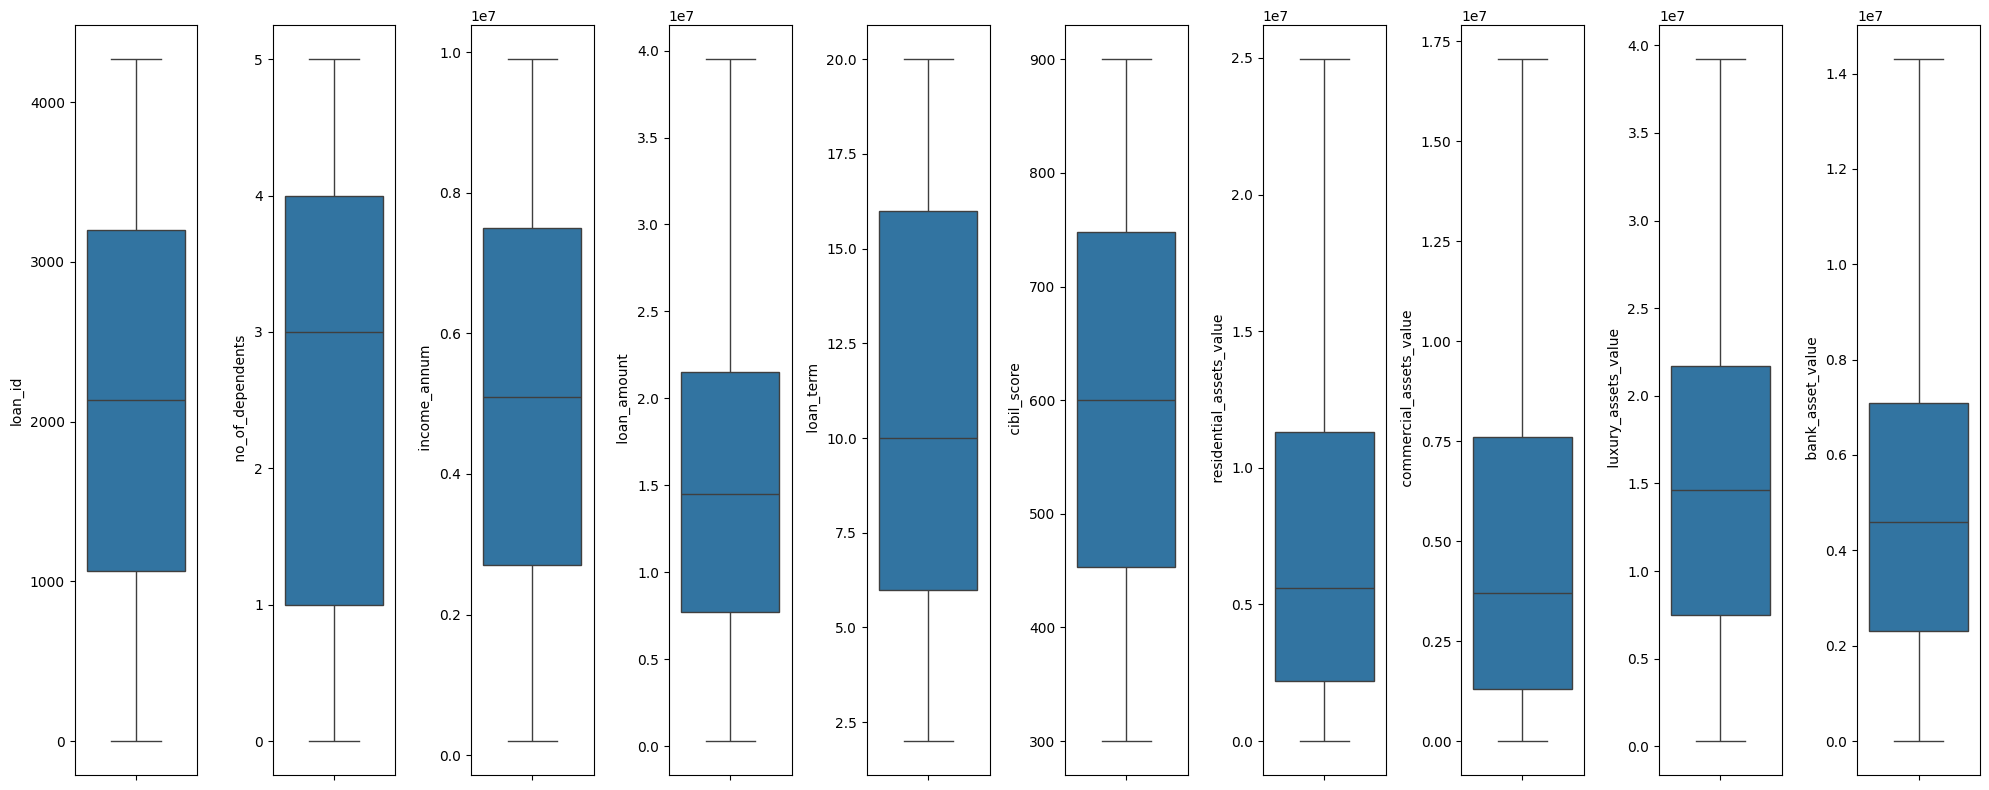

In [19]:
plt.figure(figsize = (20,8))
for i in range(len(num_cols)):
    plt.subplot(1,len(num_cols),i+1)
    sns.boxplot(df[num_cols[i]], orient = "v")
    plt.tight_layout() 

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4269 entries, 0 to 4268
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   loan_id                    4269 non-null   int64  
 1    no_of_dependents          4269 non-null   int64  
 2    education                 4269 non-null   object 
 3    self_employed             4269 non-null   object 
 4    income_annum              4269 non-null   int64  
 5    loan_amount               4269 non-null   int64  
 6    loan_term                 4269 non-null   int64  
 7    cibil_score               4269 non-null   int64  
 8    residential_assets_value  4269 non-null   float64
 9    commercial_assets_value   4269 non-null   float64
 10   luxury_assets_value       4269 non-null   int64  
 11   bank_asset_value          4269 non-null   float64
 12   loan_status               4269 non-null   object 
dtypes: float64(3), int64(7), object(3)
memory usage:

In [21]:
df_object = df.select_dtypes(["object"])
obj_cols = list(df_object.columns)

obj_cols.remove(" loan_status")

In [22]:
df_result = pd.get_dummies(df, columns = obj_cols)
df_result

,loan_id,no_of_dependents,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status,education_ Graduate,education_ Not Graduate,self_employed_ No,self_employed_ Yes
0,1,2,9600000,29900000,12,778,2400000.0,17050000.0,22700000,8000000.0,Approved,True,False,True,False
1,2,0,4100000,12200000,8,417,2700000.0,2200000.0,8800000,3300000.0,Rejected,False,True,False,True
2,3,3,9100000,29700000,20,506,7100000.0,4500000.0,33300000,12800000.0,Rejected,True,False,True,False
3,4,3,8200000,30700000,8,467,18200000.0,3300000.0,23300000,7900000.0,Rejected,True,False,True,False
4,5,5,9800000,24200000,20,382,12400000.0,8200000.0,29400000,5000000.0,Rejected,False,True,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4264,4265,5,1000000,2300000,12,317,2800000.0,500000.0,3300000,800000.0,Rejected,True,False,False,True
4265,4266,0,3300000,11300000,20,559,4200000.0,2900000.0,11000000,1900000.0,Approved,False,True,False,True
4266,4267,2,6500000,23900000,18,457,1200000.0,12400000.0,18100000,7300000.0,Rejected,False,True,True,False
4267,4268,1,4100000,12800000,8,780,8200000.0,700000.0,14100000,5800000.0,Approved,False,True,True,False


In [23]:
df_result = df_result.dropna(subset=[' loan_status'])

In [24]:
y = df_result[" loan_status"].map({" Rejected": 0, " Approved": 1})
X = df_result.drop(columns = ["loan_id", " loan_status"])

In [25]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,
                                            random_state=1, stratify = y)

In [26]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(2988, 13)
(1281, 13)
(2988,)
(1281,)


In [27]:
y_train.value_counts()

 loan_status
1    1859
0    1129
Name: count, dtype: int64

In [28]:
from sklearn.ensemble import RandomForestClassifier

classifier_rf = RandomForestClassifier(random_state=42, n_jobs=-1, max_depth=5,
                                       n_estimators=100, oob_score=True)

classifier_rf.fit(X_train, y_train)

RandomForestClassifier(max_depth=5, n_jobs=-1, oob_score=True, random_state=42)

HyperParameter Tuning

In [29]:
rf = RandomForestClassifier(random_state=42, n_jobs=-1)

In [30]:
params = {
    'max_depth': [2,3,5,10],
    'min_samples_leaf': [5,10,20,50,100],
    'n_estimators': [10,25,30,50,100]
}

In [31]:
from sklearn.model_selection import GridSearchCV

# Instantiate the grid search model
grid_search = GridSearchCV(estimator=rf,
                           param_grid=params,
                           cv = 4,
                           n_jobs=-1, verbose=1, scoring="roc_auc")

grid_search.fit(X_train, y_train)

Fitting 4 folds for each of 100 candidates, totalling 400 fits


GridSearchCV(cv=4, estimator=RandomForestClassifier(n_jobs=-1, random_state=42),
             n_jobs=-1,
             param_grid={'max_depth': [2, 3, 5, 10],
                         'min_samples_leaf': [5, 10, 20, 50, 100],
                         'n_estimators': [10, 25, 30, 50, 100]},
             scoring='roc_auc', verbose=1)

In [32]:
grid_search.best_score_

0.996787580055671

In [33]:
rf_best = grid_search.best_estimator_
rf_best.fit(X_train, y_train)

RandomForestClassifier(max_depth=10, min_samples_leaf=5, n_jobs=-1,
                       random_state=42)

In [34]:
y_rf = rf_best.predict(X_test)

In [35]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test, y_rf))

0.9804839968774395


In [36]:
from sklearn.metrics import precision_score
print(precision_score(y_test, y_rf, pos_label = 1, average='binary'))


0.9898477157360406


In [37]:
from sklearn.metrics import recall_score
print(recall_score(y_test, y_rf, pos_label = 1, average='binary'))


0.9786700125470514


In [38]:
from sklearn.metrics import roc_auc_score
y_rf_prob = rf_best.predict_proba(X_test)[:,1]
print(roc_auc_score(y_test, y_rf_prob))


0.997970177421529


In [39]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_rf))

              precision    recall  f1-score   support

           0       0.97      0.98      0.97       484
           1       0.99      0.98      0.98       797

    accuracy                           0.98      1281
   macro avg       0.98      0.98      0.98      1281
weighted avg       0.98      0.98      0.98      1281

